In [100]:
#libraries
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [101]:
#get data from yahoo of any company
data_frame=web.DataReader('AAPL',data_source='yahoo',start='2010-01-01',end='2022-01-01')

In [102]:
#see the data
data_frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.330002
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.289993
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.380005


In [103]:
#rows and columns
data_frame.shape

(3022, 6)

<AxesSubplot:xlabel='Date'>

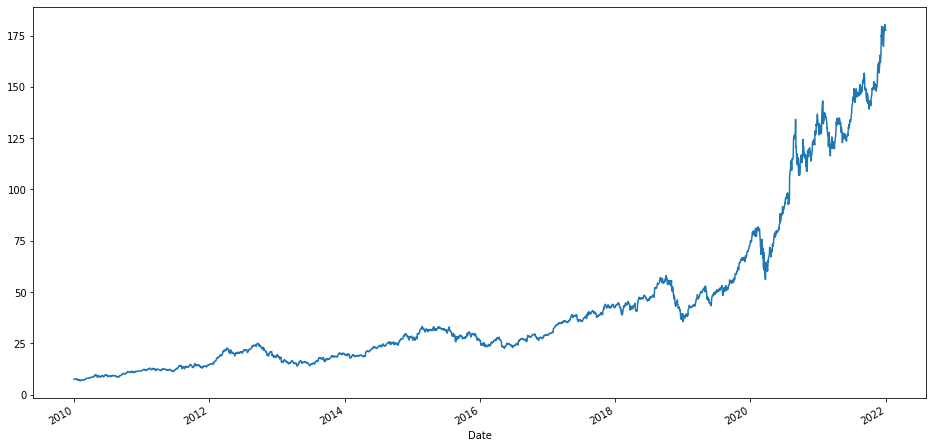

In [104]:
#see how the data looks like graphically
data_frame['Close'].plot(figsize=(16,8))

In [105]:
#get the close price of the stock data in a numpy array
data_close=data_frame.filter(['Close'])
data_close_set=data_close.values
#training set 80% of the data
training_data_len=math.ceil(len(data_close)*0.8)
training_data_len


2418

In [106]:
#scaling  the data
scale=MinMaxScaler(feature_range=(0,1))
scaled_data=scale.fit_transform(data_close)
scaled_data

array([[0.00384584],
       [0.00452113],
       [0.00459731],
       ...,
       [0.9945236 ],
       [0.98772127],
       [0.9840896 ]])

In [107]:
training_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(training_data)):
    x_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([3.84583956e-03, 4.52112883e-03, 4.59730631e-03, 3.89525473e-03,
       3.81495680e-03, 4.10319040e-03, 3.71819907e-03, 3.22613926e-03,
       3.82936876e-03, 3.57819722e-03, 2.85761599e-03, 4.73318495e-03,
       4.05172463e-03, 3.29819628e-03, 1.17351464e-03, 2.26879845e-03,
       2.85967484e-03, 3.25908362e-03, 1.49056939e-03, 2.05610186e-06,
       5.51755483e-04, 7.84400109e-04, 1.47821629e-03, 0.00000000e+00,
       7.02046083e-04, 4.26168341e-04, 8.52342181e-04, 6.32047909e-04,
       1.36292340e-03, 1.71498136e-03, 2.33674052e-03, 2.16174371e-03,
       2.23997454e-03, 1.98056485e-03, 1.72321402e-03, 1.03145669e-03,
       1.77262918e-03, 2.04850692e-03, 2.58791205e-03, 3.48761329e-03,
       3.45878938e-03, 3.55760597e-03, 3.84172186e-03, 5.53817907e-03,
       5.56494413e-03, 6.37611204e-03, 6.75081187e-03, 6.88669051e-03,
       7.11316408e-03, 6.54493505e-03, 6.67051944e-03, 6.60258012e-03,
       6.71169645e-03, 6.21758329e-03, 6.73228496e-03, 7.47551080e-03,
     

In [108]:
#convert training datasets to numpy and reshaping the data
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2358, 60, 1)

In [109]:
#lstm model
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [110]:
#running the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [111]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2358/2358 [==============================] - 32s 13ms/step - loss: 1.4122e-04


In [112]:
#creating test-data set
test_data=scaled_data[training_data_len-60:,:]
x_test=[]
y_test=data_close_set[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [113]:
#make data into numpy
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [114]:
#Get the predicted price of the stock
predictions=model.predict(x_test)
predictions=scale.inverse_transform(predictions)

In [115]:
#get root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.9874086190533164

In [118]:
#plot data
train=data_close[:training_data_len]
valid=data_close[training_data_len:]
valid['Predictions']=predictions


C:\Users\risha\AppData\Local\Temp\ipykernel_13980\1090442803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


KeyError: ('Close', 'Predictions')

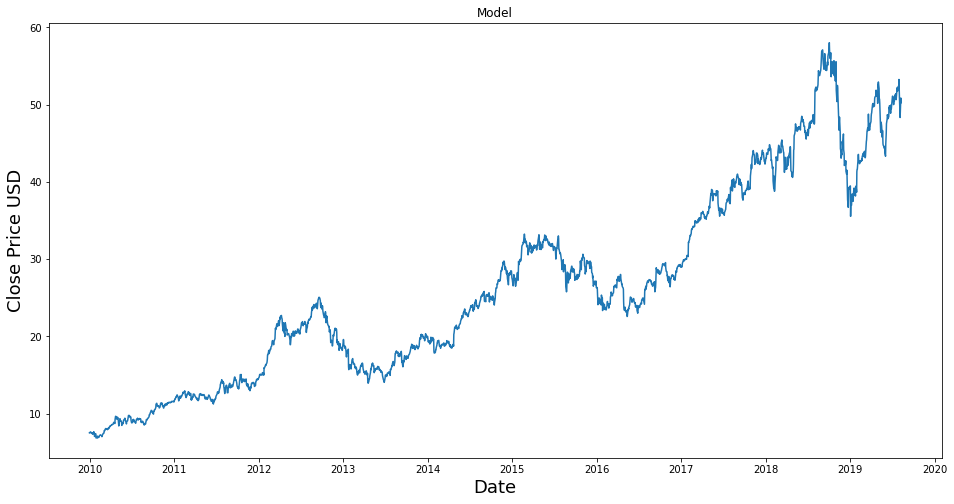

In [117]:
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid['Close','Predictions'])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()